---
# 프로젝트 정보

- **개요**

    - 게임 유저/매출 데이터를 바탕으로 전반적인 서비스 지표 확인

- **배경**

    - 게임산업에서는 유저 데이터를 기반으로 다양한 지표를 모니터링 하고 있습니다.
    - 이를 통하여 사업, 운영 등 유관부서에서는 아래와 같이 활용하고 있습니다.

        1. 현 상태 확인
        2. 사업수립 방향 설정 
        3. 고객 세그먼트별 인사이트 도출
        4. 이슈, 특이사항 확인

- **주제**

    - [그룹B] 한눈에 보는 게임 데이터 : project_groupB_data
    - 태블로를 사용하여 유관부서를 대상으로 하는 유저 접속/매출 대시보드 개발

- **설명**

    - 주어진 데이터를 통해 아래 시각화 표현을 진행합니다.
    - 대시보드에서 필터를 이용한 특정 기간의 데이터 확인이 가능해야 합니다.
    - 대시보드는 크게 유저와 매출 부분으로 나누어 배치해주세요.
    - 대시보드 최상단에 가장 중요하다고 생각하는 Key-Value 값을 표로 요약하여 표현해주세요.
    - 최소 1개 이상의 계산된 필드를 포함해주세요.
    - 데이터 0, NULL 값 유무를 확인하고 시각화를 진행해주세요.
    - 이중 축을 이용한 그래프를 포함해주세요. (도넛 차트가 아니여도 괜찮습니다.)
    - 칼럼 설명
        - User_id - 유저 고유 번호(고객 구분번호로 중복값 없음)
        - First_name - 이름
        - Last_name - 성
        - Email - 이메일 주소
        - Gender - 성별
        - Ip_address - 게임 접속 ip 주소
        - Country - 접속 국가
        - Pay_store - 결제 플랫폼(ex. 구글 플레이 스토어)
        - Pay_amount - 결제 금액
        - information_agree - 정보제공동의(TRUE OR FALSE)
        - First_login_date - 게임 가입일자
        - Pay_User_type - 결제 유저 타입
        - Level - 레벨
        - Action_user_type - 액션 유저 타입
        - Playtime - 플레이 타임(초)
        - Battle_pass_level - 배틀패스 레벨
        - last_login_date - 마지막 접속일자
        - main_pay_item - 주요 결제 아이템
        - pay_count - 결제 횟수

---
# 라이브러리

In [1]:
# library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings(action= 'ignore')

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_seq_items', None)

---
# 데이터 로드

In [2]:
# pd.read_csv()

# 데이터셋 원본 호출
game_df_org = pd.read_csv('C:/Users/ucanb/OneDrive/03_DATABASE/02_PYTHON/02_DATA/04_project_groupB_data_new2.csv')

# 데이터 복사본 생성
game_df = game_df_org.copy()
game_df = game_df.loc[:999]

# 데이터 확인
game_df.info()
game_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            1000 non-null   object 
 1   first_name         1000 non-null   object 
 2   last_name          1000 non-null   object 
 3   email              1000 non-null   object 
 4   gender             1000 non-null   object 
 5   ip_address         1000 non-null   object 
 6   country            1000 non-null   object 
 7   pay_store          1000 non-null   object 
 8   pay_amount         1000 non-null   float64
 9   information_agree  1000 non-null   object 
 10  first_login_date   1000 non-null   object 
 11  pay_user_type      1000 non-null   object 
 12  level              1000 non-null   float64
 13  action_user_type   1000 non-null   object 
 14  playtime           1000 non-null   float64
 15  battle_pass_level  1000 non-null   float64
 16  last_login_date    1000 n

,user_id,first_name,last_name,email,gender,ip_address,country,pay_store,pay_amount,information_agree,first_login_date,pay_user_type,level,action_user_type,playtime,battle_pass_level,last_login_date,main_pay_item,pay_count
0,0a3e6ec7-0566-468c-a6b8-ae08484baeab,Tobe,Mallabar,tmallabari@wordpress.com,M,26.88.43.89,China,AOS,1202020.0,False,2021-05-23,heavy user,100.0,fishing,9996.17,20.0,2023-07-27,Levelup package,8.0
1,2aeee7a4-7e40-47e7-8d06-e24c2b869b62,Gerty,Pimlott,gpimlott97@is.gd,F,223.7.255.124,Sweden,AOS,1412096.0,True,2021-11-21,heavy user,100.0,raid,9995.47,20.0,2024-03-04,Gotcha package,7.0
2,40398eee-ae54-4929-8b2b-b3efce2bbe45,Clemence,Moncarr,cmoncarr6n@europa.eu,F,193.187.40.129,Japan,Other,1150450.0,True,2021-12-23,heavy user,99.0,fishing,9985.49,20.0,2024-03-14,Levelup package,6.0
3,19dee50f-ca43-4d9f-bbe4-de726f63255f,Nona,Satterlee,nsatterlee7i@census.gov,M,90.156.191.139,Thailand,Other,999731.0,False,2021-06-21,heavy user,99.0,fishing,9977.06,20.0,2023-11-25,Costume package,7.0
4,a0db93cd-876b-4156-9f9d-d5eec5a4c973,Juditha,Kilmary,jkilmarydw@imdb.com,M,138.30.116.15,Central African Republic,Other,1720862.0,True,2021-07-21,heavy user,99.0,fishing,9949.63,20.0,2023-06-30,Levelup package,5.0


---
# 데이터 EDA

In [3]:
# EDA : 'user_id'

# 'user_id' 데이터 확인
display(game_df[['user_id']])

# 'user_id' 전체 갯수 확인
print('* total count:', game_df['user_id'].count())

# 'user_id' 중복 유무 확인
print('* unique count:', game_df['user_id'].nunique())
print()

,user_id
0,0a3e6ec7-0566-468c-a6b8-ae08484baeab
1,2aeee7a4-7e40-47e7-8d06-e24c2b869b62
2,40398eee-ae54-4929-8b2b-b3efce2bbe45
3,19dee50f-ca43-4d9f-bbe4-de726f63255f
4,a0db93cd-876b-4156-9f9d-d5eec5a4c973
...,...
995,3be8d0c5-df08-42aa-b86c-18d7689c8231
996,199abedb-6efc-4e49-b282-24ae6ac5f522
997,f83bcaab-5eb4-48ce-a8b3-1dffc8117eb6
998,04353c9e-6b03-45c9-a932-0adf6308631b


* total count: 1000
* unique count: 1000



In [4]:
# EDA : 'first_name'

# 'first_name' 데이터 확인
display(game_df[['first_name']])

# 'first_name' 전체 갯수 확인
print('* total count:', game_df['first_name'].count())
print()

# 'first_name' 중복 유무 확인
print('* unique count:', game_df['first_name'].nunique())

# 'first_name' 중복값 갯수 확인
print("* duplication count:", game_df[game_df['first_name'].duplicated()]['first_name'].nunique())

,first_name
0,Tobe
1,Gerty
2,Clemence
3,Nona
4,Juditha
...,...
995,Carny
996,Perl
997,Deonne
998,Marya


* total count: 1000

* unique count: 933
* duplication count: 66


In [5]:
# EDA : 'last_name'

# 'last_name' 데이터 확인
display(game_df[['last_name']])

# 'last_name' 전체 갯수 확인
print('* total count:', game_df['last_name'].count())
print()

# 'last_name' 중복 유무 확인
print('* unique count:', game_df['last_name'].nunique())

# 'last_name' 중복값 갯수 확인
print("* duplication count:", game_df[game_df['last_name'].duplicated()]['last_name'].nunique())

,last_name
0,Mallabar
1,Pimlott
2,Moncarr
3,Satterlee
4,Kilmary
...,...
995,Probert
996,Yurchenko
997,Reynolds
998,Catlow


* total count: 1000

* unique count: 991
* duplication count: 9


In [6]:
# EDA : 'email'

# 'email' 데이터 확인
display(game_df[['email']])

# 'email' 전체 갯수 확인
print('* total count:', game_df['email'].count())

# 'email' 중복 유무 확인
print('* unique count:', game_df['email'].nunique())
print()

# 'email' 도메인별 갯수 확인
A = []
for i in range(len(game_df)):
    domains = game_df['email'][i][game_df['email'][i].index('@')+1:]
    A.append(domains)

print('* domain unique count:', len(set(A)))
print()

,email
0,tmallabari@wordpress.com
1,gpimlott97@is.gd
2,cmoncarr6n@europa.eu
3,nsatterlee7i@census.gov
4,jkilmarydw@imdb.com
...,...
995,cprobertd7@ovh.net
996,pyurchenkof1@soup.io
997,dreynoldsia@jugem.jp
998,mcatlowpx@merriam-webster.com


* total count: 1000
* unique count: 1000

* domain unique count: 429



In [7]:
# EDA : 'gender'

# 'gender' 도수 및 상대도수 확인
gender_A = pd.concat([pd.DataFrame(game_df['gender'].value_counts()), pd.DataFrame(game_df['gender'].value_counts(normalize= True))], axis = 1)
gender_B = pd.merge(gender_A, game_df[['gender', 'pay_amount']].groupby(['gender']).mean().round(1), on= 'gender', how= 'inner')
gender_C = pd.merge(gender_B, game_df[['gender', 'pay_amount']].groupby(['gender']).median().round(1), on= 'gender', how= 'inner').reset_index()

# 칼럼명 변경
gender_C.rename(columns= {'pay_amount_x' : 'pay_amount(mean)', 'pay_amount_y' : 'pay_amount(median)'}, inplace= True)

# 데이터 확인
display(gender_C)
print('* total count:', sum(gender_C['count']))

,gender,count,proportion,pay_amount(mean),pay_amount(median)
0,F,512,0.512,409649.8,377284.0
1,M,488,0.488,417192.7,381814.5


* total count: 1000


In [8]:
# EDA : 'ip_address'

# 'ip_address' 데이터 확인
display(game_df[['ip_address']])

# 'ip_address' 전체 갯수 확인
print('* total count:', game_df['ip_address'].count())

# 'ip_address' 중복 유무 확인
print('* unique count:', game_df['ip_address'].nunique())

,ip_address
0,26.88.43.89
1,223.7.255.124
2,193.187.40.129
3,90.156.191.139
4,138.30.116.15
...,...
995,26.187.103.32
996,206.51.116.54
997,49.178.110.76
998,41.13.29.47


* total count: 1000
* unique count: 1000


,country,count,proportion,pay_amount(mean),pay_amount(median)
0,China,191,0.191,431121.4,384480.0
1,Indonesia,100,0.100,406699.7,372401.5
2,Philippines,61,0.061,420974.3,382678.0
3,Russia,54,0.054,406025.7,363881.5
4,France,47,0.047,328214.3,355124.0
...,...,...,...,...,...
116,Paraguay,1,0.001,418847.0,418847.0
117,Gambia,1,0.001,419095.0,419095.0
118,Kuwait,1,0.001,454985.0,454985.0
119,Estonia,1,0.001,454342.0,454342.0


* total count: 1000



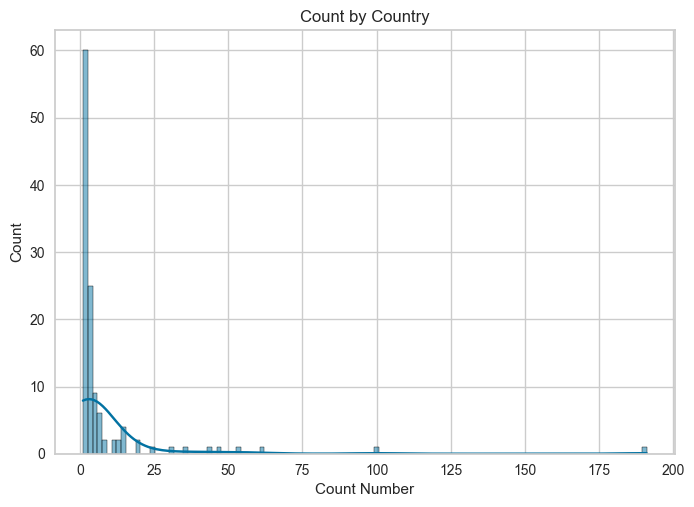

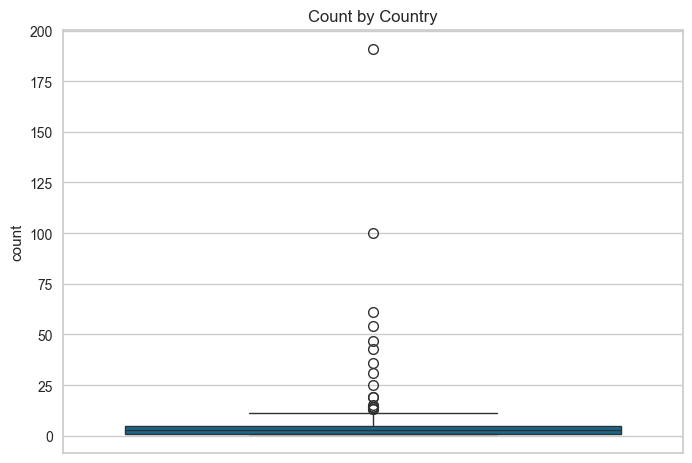

* country(count <= 15): 110 / 121
* country(count <= 25):   3 / 121
* country(count  > 25):   8 / 121

* outlier count: 17 / 121


In [9]:
# EDA : 'country'

# 'country' 도수 및 상대도수 확인
country_A = pd.concat([pd.DataFrame(game_df['country'].value_counts()), pd.DataFrame(game_df['country'].value_counts(normalize= True))], axis = 1)
country_B = pd.merge(country_A, game_df[['country', 'pay_amount']].groupby(['country']).mean().round(1), on= 'country', how= 'inner')
country_C = pd.merge(country_B, game_df[['country', 'pay_amount']].groupby(['country']).median().round(1), on= 'country', how= 'inner').reset_index()

# 칼럼명 변경
country_C.rename(columns= {'pay_amount_x' : 'pay_amount(mean)', 'pay_amount_y' : 'pay_amount(median)'}, inplace= True)

# 데이터 확인
display(country_C)
print('* total count:', sum(country_C['count']))
print()

# 히스토그램 확인
sns.histplot(country_C['count'], kde= True)
plt.title('Count by Country')
plt.xlabel('Count Number')
plt.show()

# 박스플롯 확인
sns.boxplot(country_C['count'])
plt.title('Count by Country')
plt.show()

# 이상치 확인
q1 = country_C['count'].quantile(0.25)
q3 = country_C['count'].quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + (1.5 * IQR)

# 데이터 확인
print('* country(count <= 15):', len(country_C[country_C['count'] <= 15]), '/ 121')
print('* country(count <= 25):  ', len(country_C[country_C['count'] <= 25]) - len(country_C[country_C['count'] <= 15]), '/ 121')
print('* country(count  > 25):  ', len(country_C[country_C['count']  > 25]), '/ 121')
print()
print('* outlier count:', sum(country_C['count'] > upper_limit), '/ 121')

,pay_store,count,proportion,pay_amount(mean),pay_amount(median)
0,Other,699,0.699,410818.3,385969.0
1,AOS,151,0.151,415319.2,365771.0
2,IOS,150,0.150,423037.0,360631.5


* total count: 1000


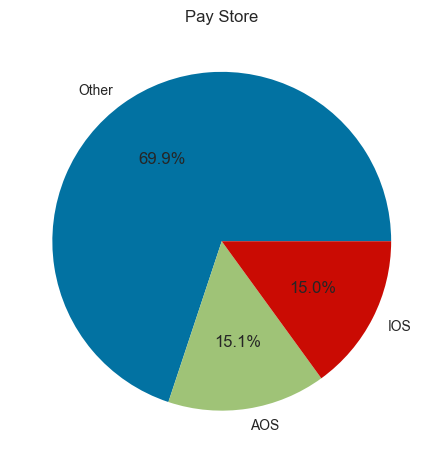

In [10]:
# EDA : 'pay_store'

# 'pay_store' 도수 및 상대도수 확인
pay_store_A = pd.concat([pd.DataFrame(game_df['pay_store'].value_counts()), pd.DataFrame(game_df['pay_store'].value_counts(normalize= True))], axis = 1)
pay_store_B = pd.merge(pay_store_A, game_df[['pay_store', 'pay_amount']].groupby(['pay_store']).mean().round(1), on= 'pay_store', how= 'inner')
pay_store_C = pd.merge(pay_store_B, game_df[['pay_store', 'pay_amount']].groupby(['pay_store']).median().round(1), on= 'pay_store', how= 'inner').reset_index()

# 칼럼명 변경
pay_store_C.rename(columns= {'pay_amount_x' : 'pay_amount(mean)', 'pay_amount_y' : 'pay_amount(median)'}, inplace= True)

# 데이터 확인
display(pay_store_C)
print('* total count:', sum(pay_store_C['count']))

# 파이차트 확인
plt.pie(pay_store_C['count'], labels= pay_store_C['pay_store'], autopct = '%.1f%%')
plt.title('Pay Store')
plt.show()

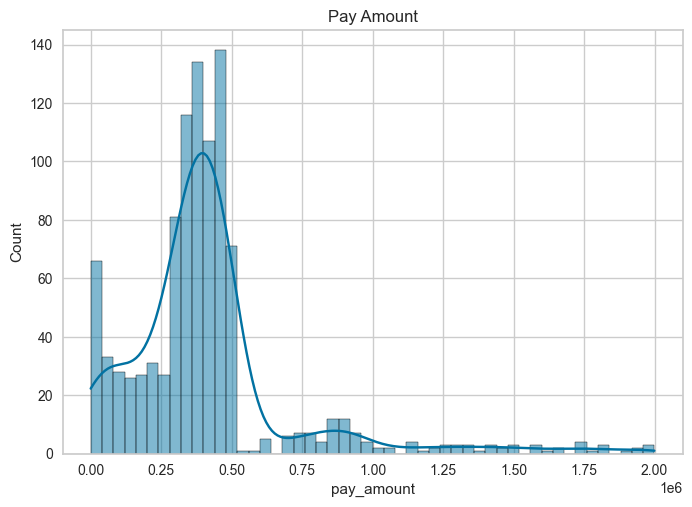

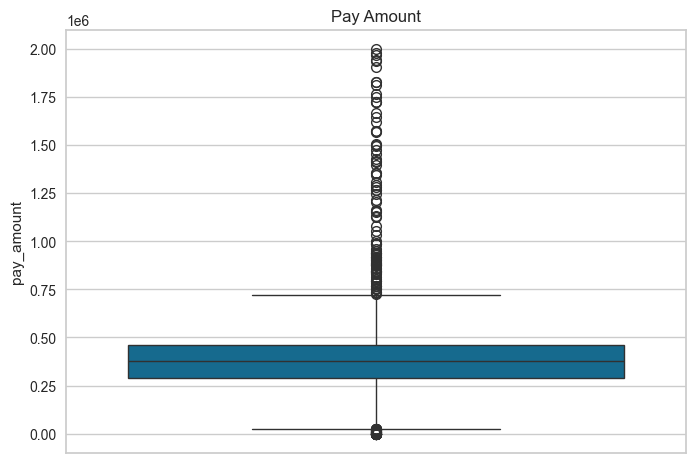

* sum of 'pay_amount': 413330719.0
* pay_amount > upper limit : 102
* pay_amount < lower limit : 47


In [11]:
# EDA : 'pay_amount'

# 히스토그램 확인
sns.histplot(game_df['pay_amount'], kde= True, bins= 50)
plt.title('Pay Amount')
plt.show()

# 박스플롯 확인
sns.boxplot(game_df['pay_amount'])
plt.title('Pay Amount')
plt.show()

# 이상치 확인
q1 = game_df['pay_amount'].quantile(0.25)
q3 = game_df['pay_amount'].quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + (1.5 * IQR)
lower_limit = q1 - (1.5 * IQR)

# 데이터 확인
print("* sum of 'pay_amount':", sum(game_df['pay_amount']))
print('* pay_amount > upper limit :', game_df['user_id'][game_df['pay_amount'] > upper_limit].count())
print('* pay_amount < lower limit :', game_df['user_id'][game_df['pay_amount'] < lower_limit].count())

In [12]:
# EDA : 'information_agree'

# 'information_agree' 도수 및 상대도수 확인
information_agree_A = pd.concat([pd.DataFrame(game_df['information_agree'].value_counts()), pd.DataFrame(game_df['information_agree'].value_counts(normalize= True))], axis = 1)
information_agree_B = pd.merge(information_agree_A, game_df[['information_agree', 'pay_amount']].groupby(['information_agree']).mean().round(1), on= 'information_agree', how= 'inner')
information_agree_C = pd.merge(information_agree_B, game_df[['information_agree', 'pay_amount']].groupby(['information_agree']).median().round(1), on= 'information_agree', how= 'inner').reset_index()

# 칼럼명 변경
information_agree_C.rename(columns= {'pay_amount_x' : 'pay_amount(mean)', 'pay_amount_y' : 'pay_amount(median)'}, inplace= True)

# 데이터 확인
display(information_agree_C)
print('* total count:', sum(information_agree_C['count']))

,information_agree,count,proportion,pay_amount(mean),pay_amount(median)
0,False,510,0.51,407174.8,374152.5
1,True,490,0.49,419737.9,387519.5


* total count: 1000


,first_login_date,count,proportion,pay_amount(mean),pay_amount(median)
0,2021-07-21,30,0.030,453020.7,363600.5
1,2021-03-22,29,0.029,356176.0,320995.0
2,2021-08-21,29,0.029,398315.4,436195.0
3,2021-12-21,27,0.027,413477.8,389932.0
4,2021-01-23,27,0.027,392938.4,410700.0
5,2021-05-21,26,0.026,342887.4,384158.0
6,2021-10-21,25,0.025,549567.2,396377.0
7,2021-06-22,25,0.025,370585.2,336962.0
8,2021-07-22,24,0.024,356705.9,406678.0
9,2021-01-20,24,0.024,367044.6,392025.5


* total count: 1000


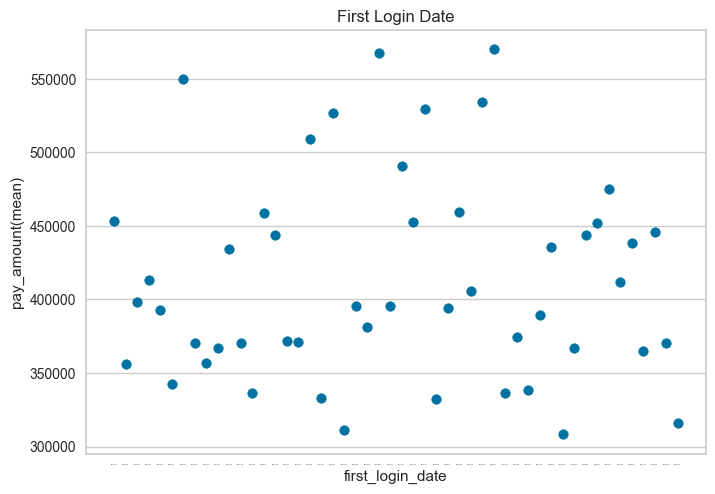

In [13]:
# EDA : 'first_login_date'

# 'first_login_date' 도수 및 상대도수 확인
first_login_date_A = pd.concat([pd.DataFrame(game_df['first_login_date'].value_counts()), pd.DataFrame(game_df['first_login_date'].value_counts(normalize= True))], axis = 1)
first_login_date_B = pd.merge(first_login_date_A, game_df[['first_login_date', 'pay_amount']].groupby(['first_login_date']).mean().round(1), on= 'first_login_date', how= 'inner')
first_login_date_C = pd.merge(first_login_date_B, game_df[['first_login_date', 'pay_amount']].groupby(['first_login_date']).median().round(1), on= 'first_login_date', how= 'inner').reset_index()

# 칼럼명 변경
first_login_date_C.rename(columns= {'pay_amount_x' : 'pay_amount(mean)', 'pay_amount_y' : 'pay_amount(median)'}, inplace= True)

# 데이터 확인
display(first_login_date_C)
print('* total count:', sum(first_login_date_C['count']))

# 산점도 확인
plt.scatter(first_login_date_C['first_login_date'], first_login_date_C['pay_amount(mean)'])
plt.grid(False, axis= 'x')
plt.title('First Login Date')
plt.xlabel('first_login_date')
plt.tick_params(labelsize= -1, axis= 'x')
plt.ylabel('pay_amount(mean)')
plt.show()

,pay_user_type,count,proportion,pay_amount(mean),pay_amount(median)
0,heavy user,722,0.722,419693.1,379931.5
1,light user,144,0.144,420767.9,391453.5
2,medium user,134,0.134,371057.8,369412.5


* total count: 1000


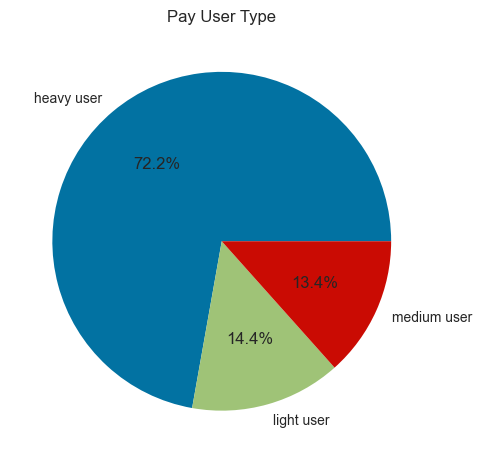

In [14]:
# EDA : 'pay_user_type'

# 'pay_user_type' 도수 및 상대도수 확인
pay_user_type_A = pd.concat([pd.DataFrame(game_df['pay_user_type'].value_counts()), pd.DataFrame(game_df['pay_user_type'].value_counts(normalize= True))], axis = 1)
pay_user_type_B = pd.merge(pay_user_type_A, game_df[['pay_user_type', 'pay_amount']].groupby(['pay_user_type']).mean().round(1), on= 'pay_user_type', how= 'inner')
pay_user_type_C = pd.merge(pay_user_type_B, game_df[['pay_user_type', 'pay_amount']].groupby(['pay_user_type']).median().round(1), on= 'pay_user_type', how= 'inner').reset_index()

# 칼럼명 변경
pay_user_type_C.rename(columns= {'pay_amount_x' : 'pay_amount(mean)', 'pay_amount_y' : 'pay_amount(median)'}, inplace= True)

# 데이터 확인
display(pay_user_type_C)
print('* total count:', sum(pay_user_type_C['count']))

# 파이차트 확인
plt.pie(pay_user_type_C['count'], labels= pay_user_type_C['pay_user_type'], autopct = '%.1f%%')
plt.title('Pay User Type')
plt.show()

,level,count,proportion,pay_amount(mean),pay_amount(median)
0,27.0,18,0.018,395986.2,376493.5
1,5.0,18,0.018,55840.9,56791.5
2,49.0,17,0.017,404566.7,395361.0
3,89.0,17,0.017,546472.1,432942.0
4,23.0,16,0.016,210231.2,219379.5
...,...,...,...,...,...
95,21.0,5,0.005,232509.8,220618.0
96,82.0,4,0.004,418505.0,417054.5
97,85.0,4,0.004,383028.8,371067.0
98,6.0,4,0.004,46121.2,45007.0


* total count: 1000


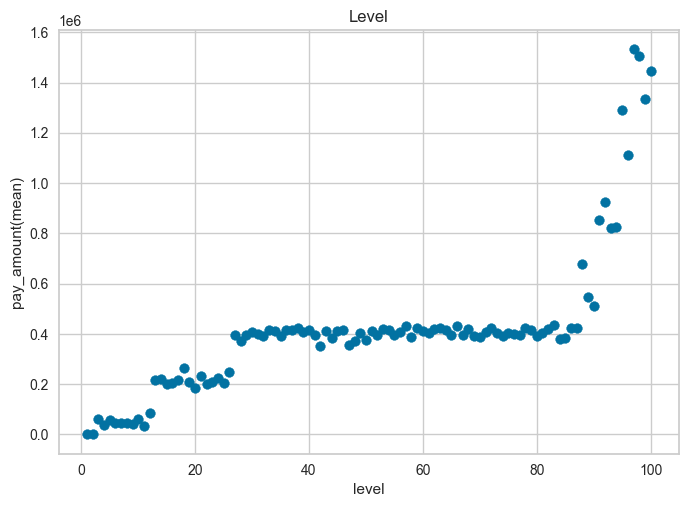

In [15]:
# EDA : 'level'

# 'level' 도수 및 상대도수 확인
level_A = pd.concat([pd.DataFrame(game_df['level'].value_counts()), pd.DataFrame(game_df['level'].value_counts(normalize= True))], axis = 1)
level_B = pd.merge(level_A, game_df[['level', 'pay_amount']].groupby(['level']).mean().round(1), on= 'level', how= 'inner')
level_C = pd.merge(level_B, game_df[['level', 'pay_amount']].groupby(['level']).median().round(1), on= 'level', how= 'inner').reset_index()

# 칼럼명 변경
level_C.rename(columns= {'pay_amount_x' : 'pay_amount(mean)', 'pay_amount_y' : 'pay_amount(median)'}, inplace= True)

# 데이터 확인
display(level_C)
print('* total count:', sum(level_C['count']))

# 산점도 확인
plt.scatter(level_C['level'], level_C['pay_amount(mean)'])
plt.title('Level')
plt.xlabel('level')
plt.ylabel('pay_amount(mean)')
plt.show()

,action_user_type,count,proportion,pay_amount(mean),pay_amount(median)
0,pvp,276,0.276,395435.2,381814.5
1,pve,250,0.250,405089.1,372625.0
2,fishing,244,0.244,434903.7,391106.0
3,raid,230,0.230,420877.5,369259.5


* total count: 1000


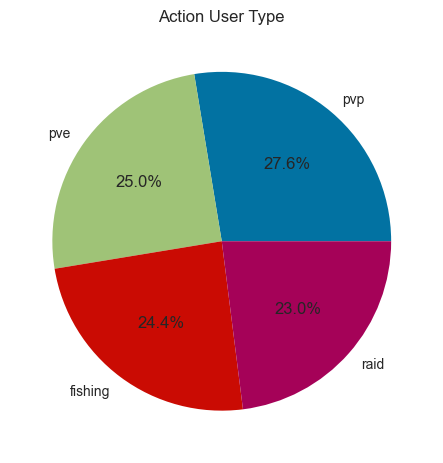

In [16]:
# EDA : 'action_user_type'

# 'action_user_type' 도수 및 상대도수 확인
action_user_type_A = pd.concat([pd.DataFrame(game_df['action_user_type'].value_counts()), pd.DataFrame(game_df['action_user_type'].value_counts(normalize= True))], axis = 1)
action_user_type_B = pd.merge(action_user_type_A, game_df[['action_user_type', 'pay_amount']].groupby(['action_user_type']).mean().round(1), on= 'action_user_type', how= 'inner')
action_user_type_C = pd.merge(action_user_type_B, game_df[['action_user_type', 'pay_amount']].groupby(['action_user_type']).median().round(1), on= 'action_user_type', how= 'inner').reset_index()

# 칼럼명 변경
action_user_type_C.rename(columns= {'pay_amount_x' : 'pay_amount(mean)', 'pay_amount_y' : 'pay_amount(median)'}, inplace= True)

# 데이터 확인
display(action_user_type_C)
print('* total count:', sum(action_user_type_C['count']))

# 파이차트 확인
plt.pie(action_user_type_C['count'], labels= action_user_type_C['action_user_type'], autopct = '%.1f%%')
plt.title('Action User Type')
plt.show()

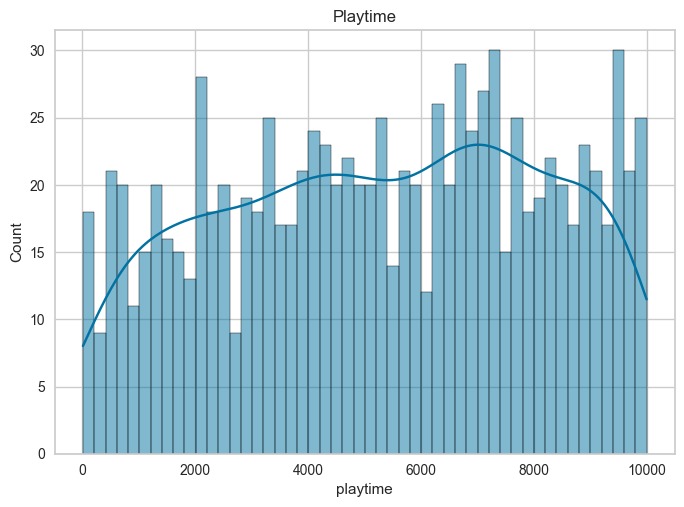

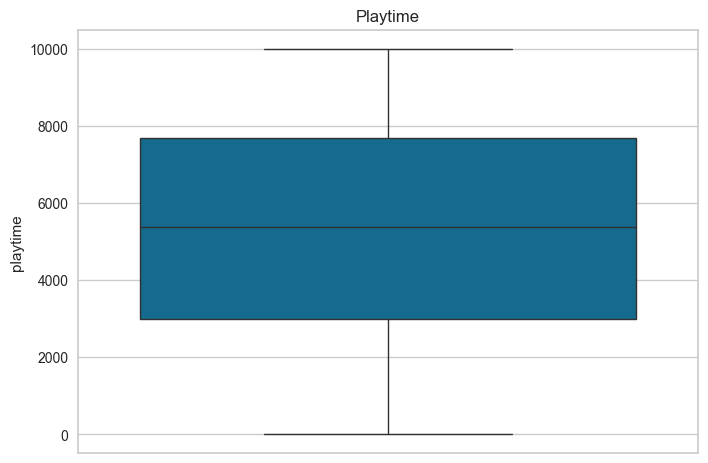

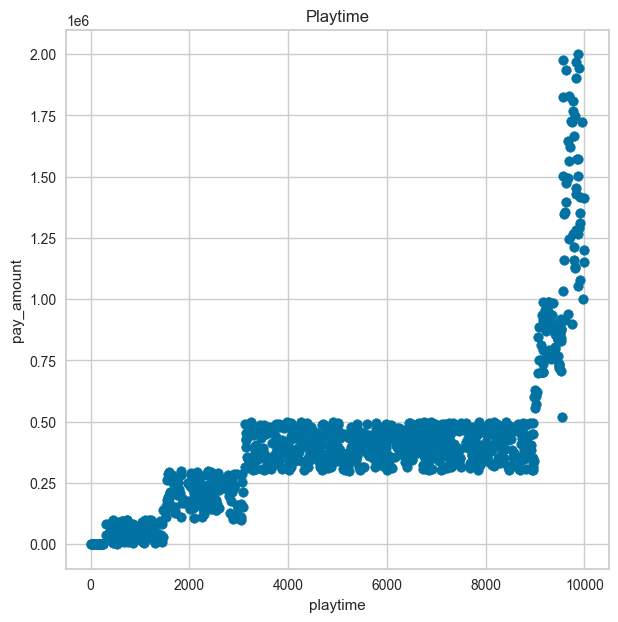

In [17]:
# EDA : 'playtime'

# 히스토그램 확인
sns.histplot(game_df['playtime'], kde= True, bins= 50)
plt.title('Playtime')
plt.show()

# 박스플롯 확인
sns.boxplot(game_df['playtime'])
plt.title('Playtime')
plt.show()

# 산점도 확인
plt.figure(figsize=(7, 7))
plt.scatter(game_df['playtime'], game_df['pay_amount'])
plt.title('Playtime')
plt.xlabel('playtime')
plt.ylabel('pay_amount')
plt.show()

,battle_pass_level,count,proportion,pay_amount(mean),pay_amount(median)
0,20.0,244,0.244,733609.3,493998.0
1,2.0,209,0.209,139892.1,142036.0
2,17.0,150,0.150,406941.6,406967.5
3,3.0,147,0.147,358600.2,370724.0
4,5.0,51,0.051,387192.2,374006.0
5,4.0,39,0.039,418145.2,422918.0
6,6.0,26,0.026,385048.7,374559.0
7,9.0,24,0.024,415685.0,425434.0
8,7.0,23,0.023,397535.0,387888.0
9,0.0,22,0.022,0.0,0.0


* total count: 1000


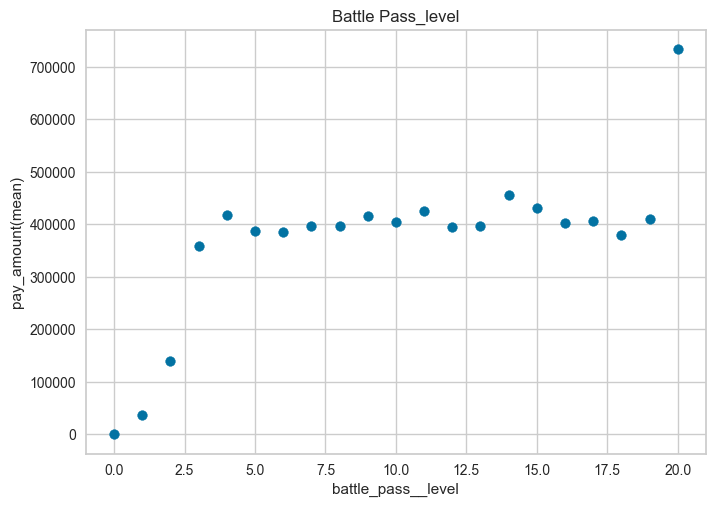

In [18]:
# EDA : 'battle_pass_level'

# 'battle_pass_level' 도수 및 상대도수 확인
battle_pass_level_A = pd.concat([pd.DataFrame(game_df['battle_pass_level'].value_counts()), pd.DataFrame(game_df['battle_pass_level'].value_counts(normalize= True))], axis = 1)
battle_pass_level_B = pd.merge(battle_pass_level_A, game_df[['battle_pass_level', 'pay_amount']].groupby(['battle_pass_level']).mean().round(1), on= 'battle_pass_level', how= 'inner')
battle_pass_level_C = pd.merge(battle_pass_level_B, game_df[['battle_pass_level', 'pay_amount']].groupby(['battle_pass_level']).median().round(1), on= 'battle_pass_level', how= 'inner').reset_index()

# 칼럼명 변경
battle_pass_level_C.rename(columns= {'pay_amount_x' : 'pay_amount(mean)', 'pay_amount_y' : 'pay_amount(median)'}, inplace= True)

# 데이터 확인
display(battle_pass_level_C)
print('* total count:', sum(battle_pass_level_C['count']))

# 산점도 확인
plt.scatter(battle_pass_level_C['battle_pass_level'], battle_pass_level_C['pay_amount(mean)'])
plt.title('Battle Pass_level')
plt.xlabel('battle_pass__level')
plt.ylabel('pay_amount(mean)')
plt.show()

,last_login_date,count,proportion,pay_amount(mean),pay_amount(median)
0,2022-11-30,6,0.006,284053.7,325485.0
1,2022-07-31,6,0.006,274833.2,305268.0
2,2022-11-27,6,0.006,275586.8,286390.0
3,2022-10-17,6,0.006,380952.2,409748.5
4,2022-10-08,5,0.005,120324.8,22702.0
...,...,...,...,...,...
524,2024-05-02,1,0.001,351663.0,351663.0
525,2024-05-14,1,0.001,386511.0,386511.0
526,2023-05-06,1,0.001,351067.0,351067.0
527,2023-11-23,1,0.001,493929.0,493929.0


* total count: 1000



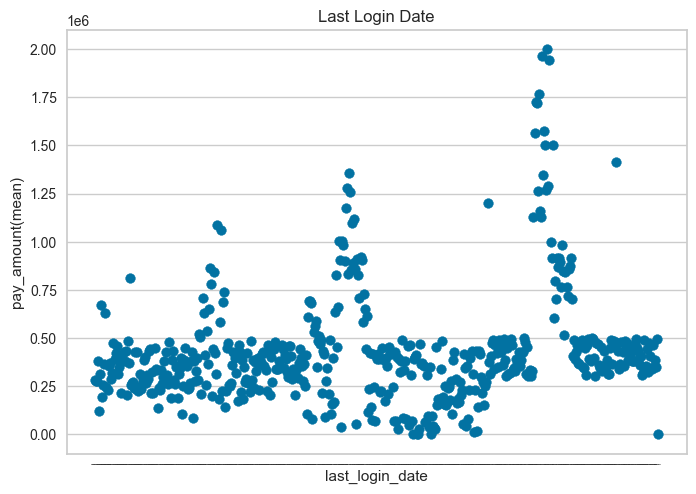

In [19]:
# EDA : 'last_login_date'

# 'last_login_date' 도수 및 상대도수 확인
last_login_date_A = pd.concat([pd.DataFrame(game_df['last_login_date'].value_counts()), pd.DataFrame(game_df['last_login_date'].value_counts(normalize= True))], axis = 1)
last_login_date_B = pd.merge(last_login_date_A, game_df[['last_login_date', 'pay_amount']].groupby(['last_login_date']).mean().round(1), on= 'last_login_date', how= 'inner')
last_login_date_C = pd.merge(last_login_date_B, game_df[['last_login_date', 'pay_amount']].groupby(['last_login_date']).median().round(1), on= 'last_login_date', how= 'inner').reset_index()

# 칼럼명 변경
last_login_date_C.rename(columns= {'pay_amount_x' : 'pay_amount(mean)', 'pay_amount_y' : 'pay_amount(median)'}, inplace= True)

# 데이터 확인
display(last_login_date_C)
print('* total count:', sum(last_login_date_C['count']))
print()

# 산점도 확인
plt.scatter(last_login_date_C['last_login_date'], last_login_date_C['pay_amount(mean)'])
plt.grid(False, axis= 'x')
plt.title('Last Login Date')
plt.xlabel('last_login_date')
plt.tick_params(labelsize= -1, axis= 'x')
plt.ylabel('pay_amount(mean)')
plt.show()

In [20]:
# EDA : 'main_pay_item'

# 'main_pay_item' 도수 및 상대도수 확인
main_pay_item_A = pd.concat([pd.DataFrame(game_df['main_pay_item'].value_counts()), pd.DataFrame(game_df['main_pay_item'].value_counts(normalize= True))], axis = 1)
main_pay_item_B = pd.merge(main_pay_item_A, game_df[['main_pay_item', 'pay_amount']].groupby(['main_pay_item']).mean().round(1), on= 'main_pay_item', how= 'inner')
main_pay_item_C = pd.merge(main_pay_item_B, game_df[['main_pay_item', 'pay_amount']].groupby(['main_pay_item']).median().round(1), on= 'main_pay_item', how= 'inner').reset_index()

# 칼럼명 변경
main_pay_item_C.rename(columns= {'pay_amount_x' : 'pay_amount(mean)', 'pay_amount_y' : 'pay_amount(median)'}, inplace= True)

# 데이터 확인
display(main_pay_item_C)
print('* total count:', sum(main_pay_item_C['count']))
print('* null count:', len(game_df) - sum(main_pay_item_C['count']))

,main_pay_item,count,proportion,pay_amount(mean),pay_amount(median)
0,Levelup package,554,0.566462,412773.1,380263.0
1,Gotcha package,266,0.271984,432605.5,379064.5
2,Costume package,112,0.114519,421281.0,386345.5
3,Accessories package,46,0.047035,486910.4,406116.5


* total count: 978
* null count: 22


,pay_count,count,proportion,pay_amount(mean),pay_amount(median)
0,6.0,132,0.132,480539.0,405009.5
1,5.0,129,0.129,417217.5,372317.0
2,10.0,124,0.124,442150.1,380034.5
3,7.0,123,0.123,498558.4,417992.0
4,8.0,122,0.122,435595.6,387180.0
5,9.0,121,0.121,456483.2,405148.0
6,2.0,82,0.082,326773.8,373098.5
7,4.0,79,0.079,304920.4,316014.0
8,3.0,66,0.066,313150.2,362613.5
9,0.0,22,0.022,0.0,0.0


* total count: 1000



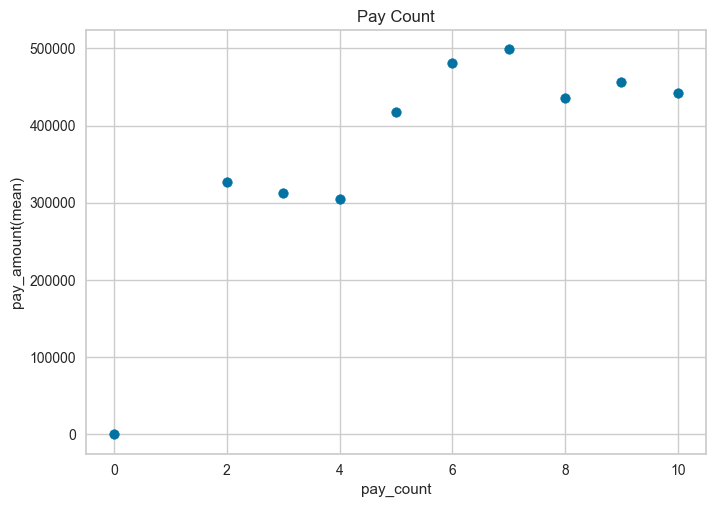

In [21]:
# EDA : 'pay_count'

# 'pay_count' 도수 및 상대도수 확인
pay_count_A = pd.concat([pd.DataFrame(game_df['pay_count'].value_counts()), pd.DataFrame(game_df['pay_count'].value_counts(normalize= True))], axis = 1)
pay_count_B = pd.merge(pay_count_A, game_df[['pay_count', 'pay_amount']].groupby(['pay_count']).mean().round(1), on= 'pay_count', how= 'inner')
pay_count_C = pd.merge(pay_count_B, game_df[['pay_count', 'pay_amount']].groupby(['pay_count']).median().round(1), on= 'pay_count', how= 'inner').reset_index()

# 칼럼명 변경
pay_count_C.rename(columns= {'pay_amount_x' : 'pay_amount(mean)', 'pay_amount_y' : 'pay_amount(median)'}, inplace= True)

# 데이터 확인
display(pay_count_C)
print('* total count:', sum(pay_count_C['count']))
print()

# 히스토그램 확인
plt.scatter(pay_count_C['pay_count'], pay_count_C['pay_amount(mean)'])
plt.title('Pay Count')
plt.xlabel('pay_count')
plt.ylabel('pay_amount(mean)')
plt.show()

---
# 데이터 분석

---
## 다중 선형회귀 (R)

---
### 선형회귀 - 모든 변수
- 다중 선형회귀 분석 (모든 변수 입력)


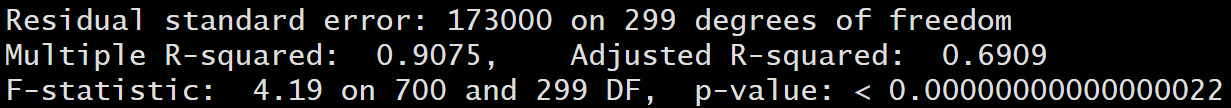
- 해석
    - 위 다중 선형회귀 모델은 통계적으로 유의한 모형이며(p-value < 0.001),
    - 조정 결정계수 0.6909로 독립변수들이 종속변수를 약 69.1% 설명하고 있다.

---
### 1) 정규성 검정
- Q-Q plot


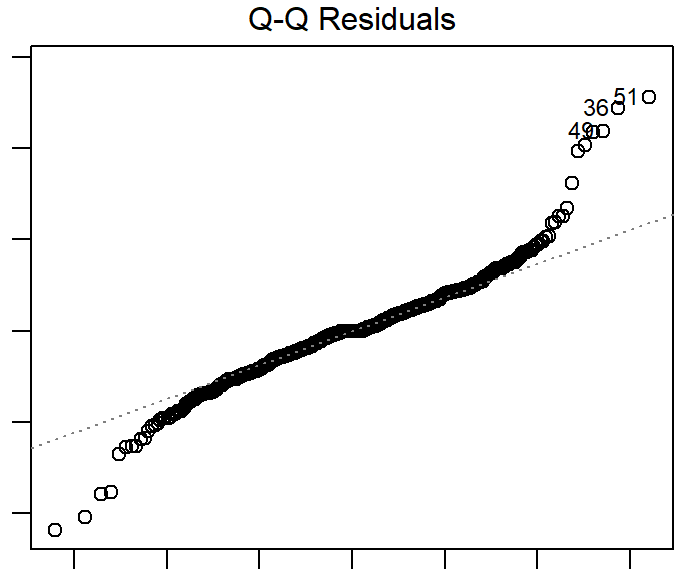
- 해석
    - 양쪽 끝 부분에서 직선을 벗어나는 점들이 많음
    - 따라서 정규성을 만족한다고 보기 어려움

=====

- 정규성 검정


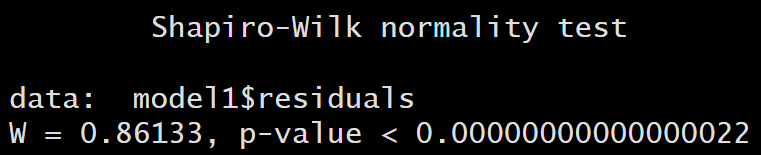
- 해석
    - 귀무가설 : 잔차는 정규성을 만족한다
    - p-value < 0.0001 → 귀무가설 기각

---
### 2) 등분산성 검정
- Scale-Location


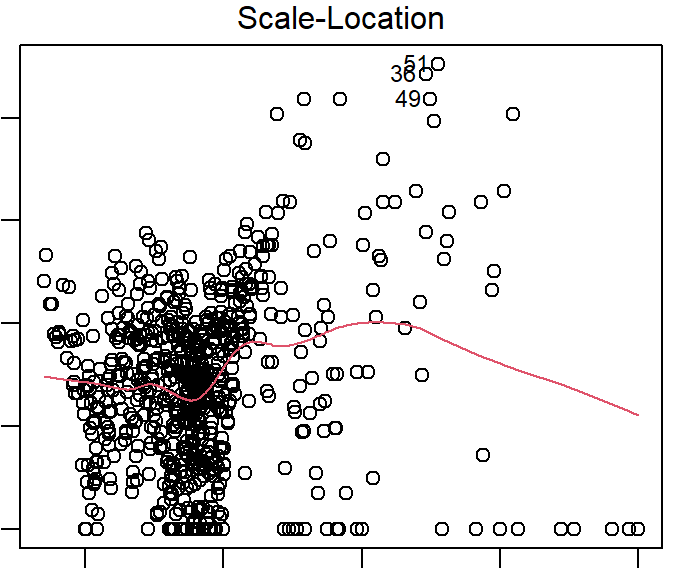
- 해석
    - 점들의 분포가 평면상 랜덤하게 퍼져있지 않고, 특정 위치에 몰려 있음
    - 따라서 등분산성을 만족하지 않음

=====

- 등분산성 검정


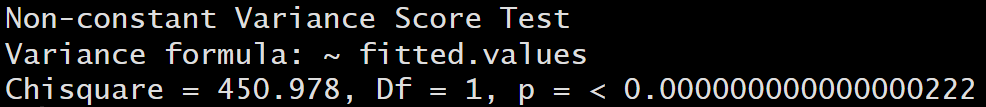
- 해석
    - 귀무가설 : 잔차는 등분산성을 만족한다
    - p-value < 0.0001 → 귀무가설 기각

---
### 3) 독립성 검정
- Durbin-Watson test


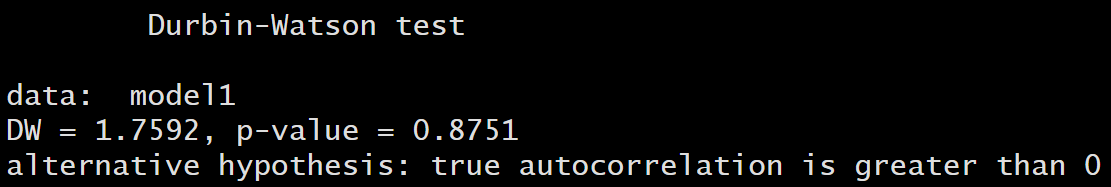
- 해석
    - 귀무가설 : 잔차는 독립성을 만족한다
    - p-value = 0.8751 → 귀무가설 기각 불가
    - DW = 1.7592 → 2에 가까울 수록 자기상관성 없음

---
### 4) 변수 선택

- 모든 변수


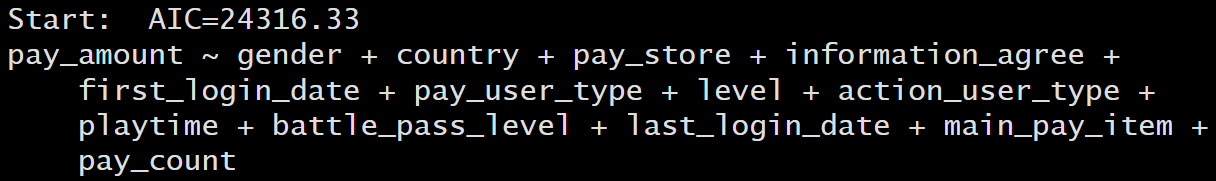

- 선택 변수


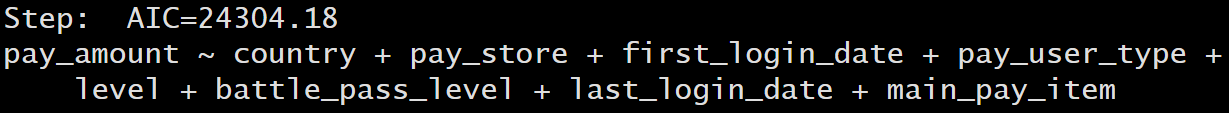
- 해석
    - 변수선택 : 후진 제거법 (AIC : 24316.33 → 24304.18)
    - 결론 : pay_amount ~ country + pay_store + first_login_date + pay_user_type + level + battle_pass_level + last_login_date + main_pay_item

---
### 선형회귀 - 선택 변수
- 다중 선형회귀 분석 (선택 변수 입력)


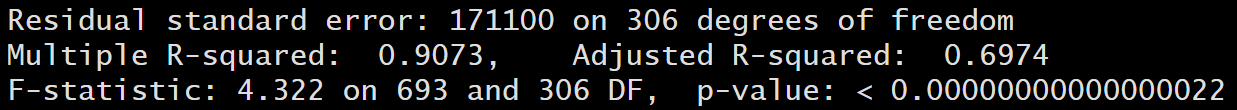
- 해석
    - 변수선택을 마친 위 다중 선형회귀 모델은 통계적으로 유의한 모형 : p-value < 0.001
    - 조정 결정계수 0.6974로 독립변수들이 종속변수를 약 69.7% 설명하고 있다.

---
### 5) 다중 선형회귀 - 결론

- 다중 선형회귀 모형(모든 변수 & 선택 변수)은 높은 조정 결정계수를 가지고 있음
- 또한 다중 선형회귀 모형(모든 변수 & 선택 변수)은 통계적으로도 유의미함
- 그리고 변수 선택 후의 다중 선형회귀 모형은 조정 결정계수가 모든 변수 모형보다 높음
    - F-statistic : 4.322
    - p-value < 0.0001
    - adjusted R-squared : 0.6974

- 그러나 이러한 결과는 잔차들의 정규성/등분산성을 만족하지 못함
    - 정규성(W) : 0.8613 (p-value < 0.0001)
    - 등분산성(Chi-square) : 450.98 (p-value < 0.0001)

- 하지만 표본의 수가 충분히 크고, 독립성을 충족하기 때문에 활용 가능
    - sample size : 1000
    - 독립성(DW) : 1.7592 (p-value = 0.8751)

---
## 고객 세그먼트 분류 (R)

---
### pay_amount ~ country
- 일원배치 ANOVA


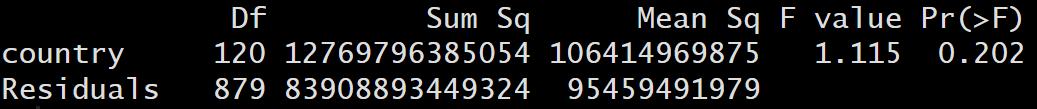
- 해석
    - 귀무가설 : 'country' 요소들 간 평균의 차이가 없음
    - p-value = 0.202 → 귀무가설 기각 불가

---
### pay_amount ~ pay_store
- 일원배치 ANOVA


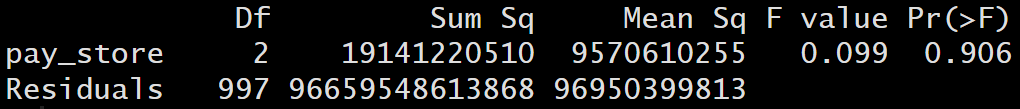
- 해석
    - 귀무가설 : 'pay_store' 요소들 간 평균의 차이가 없음
    - p-value = 0.906 → 귀무가설 기각 불가

---
### pay_amount ~ first_login_date
- 일원배치 ANOVA


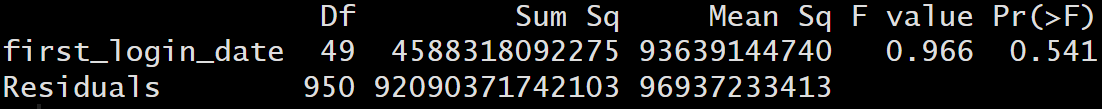
- 해석
    - 귀무가설 : 'first_login_date' 요소들 간 평균의 차이가 없음
    - p-value = 0.541 → 귀무가설 기각 불가

---
### pay_amount ~ pay_user_type
- 일원배치 ANOVA


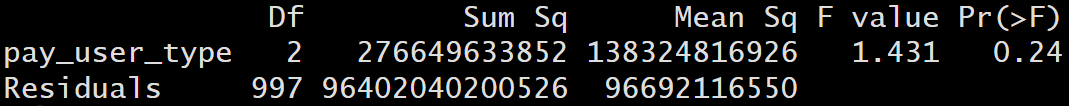
- 해석
    - 귀무가설 : 'pay_user_type' 요소들 간 평균의 차이가 없음
    - p-value = 0.240 → 귀무가설 기각 불가

---
### pay_amount ~ level ★
- 일원배치 ANOVA


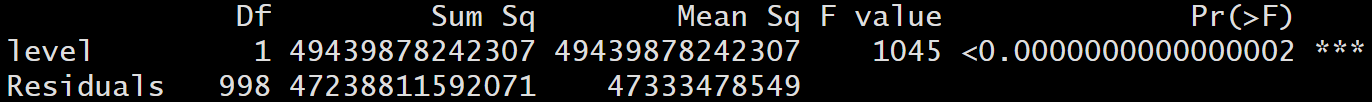
- 해석
    - 귀무가설 : 'level' 요인들 간 평균의 차이가 없음
    - p-value < 0.0001 → 귀무가설 기각
    - 정규성/등분산성/독립성 검정 실시

=====

- 정규성 검정


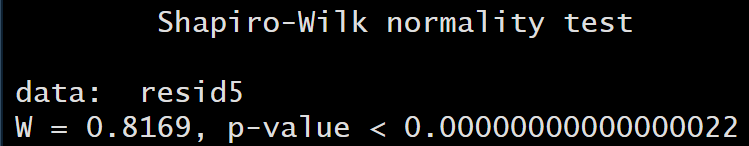
- 해석
    - 귀무가설 : 각 요인의 잔차들은 정규성을 만족한다
    - p-value < 0.0001 → 귀무가설 기각

=====

- 등분산성 검정


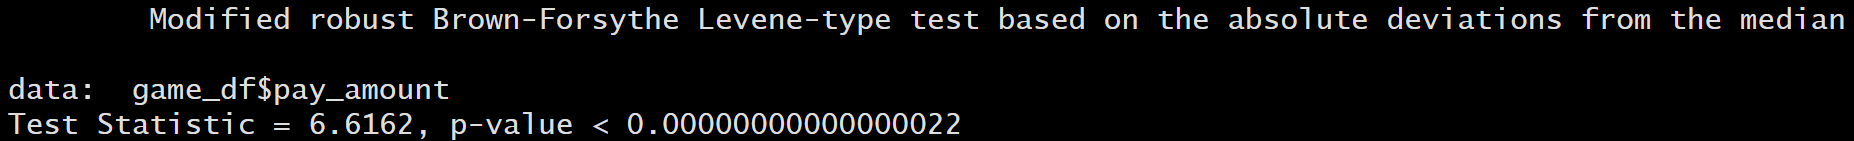
- 해석
    - 귀무가설 : 각 요인의 잔차들은 등분산성을 만족한다
    - p-value < 0.0001 → 귀무가설 기각

=====

- 독립성 검정


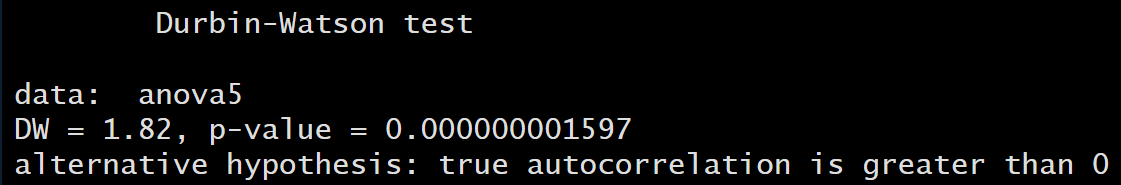
- 해석
    - 귀무가설 : 각 요인의 잔차들은 독립성을 만족한다
    - p-value < 0.0001 → 귀무가설 기각

---
### pay_amount ~ battle_pass_level ★
- 일원배치 ANOVA


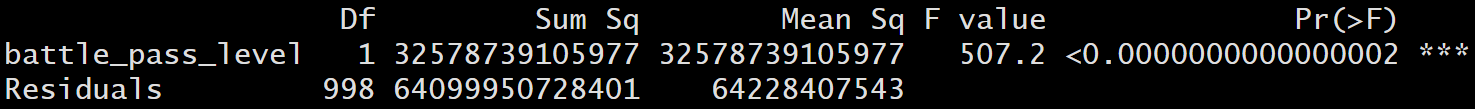
- 해석
    - 귀무가설 : 'battle_pass_level' 요소들 간 평균의 차이가 없음
    - p-value < 0.0001 → 귀무가설 기각
    - 정규성/등분산성/독립성 검정 실시

=====

- 정규성 검정


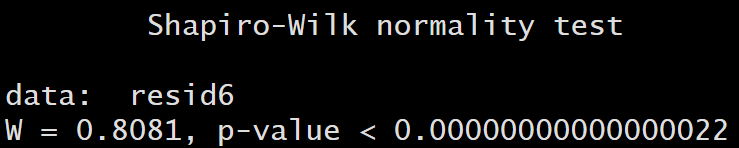
- 해석
    - 귀무가설 : 각 요인의 잔차들은 정규성을 만족한다
    - p-value < 0.0001 → 귀무가설 기각

=====

- 등분산성 검정


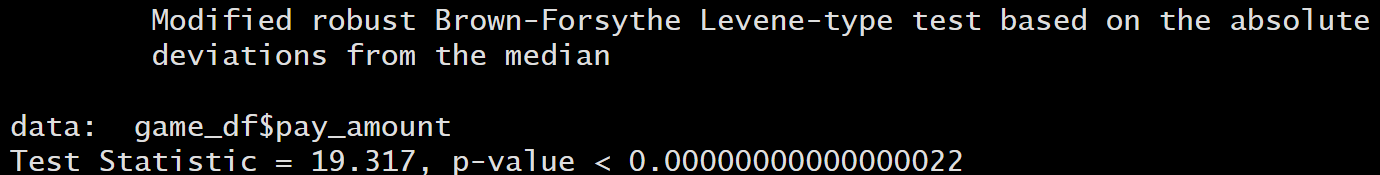
- 해석
    - 귀무가설 : 각 요인의 잔차들은 등분산성을 만족한다
    - p-value < 0.0001 → 귀무가설 기각

=====

- 독립성 검정


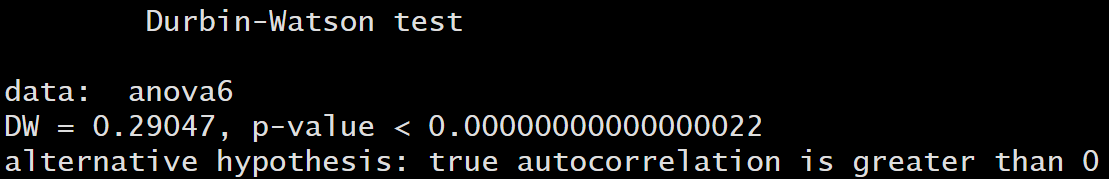
- 해석
    - 귀무가설 : 각 요인의 잔차들은 독립성을 만족한다
    - p-value < 0.0001 → 귀무가설 기각

---
### pay_amount ~ last_login_date ★
- 일원배치 ANOVA


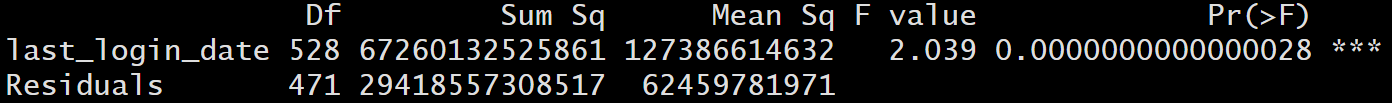
- 해석
    - 귀무가설 : 'last_login_date' 요소들 간 평균의 차이가 없음
    - p-value < 0.0001 → 귀무가설 기각
    - 정규성/등분산성/독립성 검정 실시

=====

- 정규성 검정


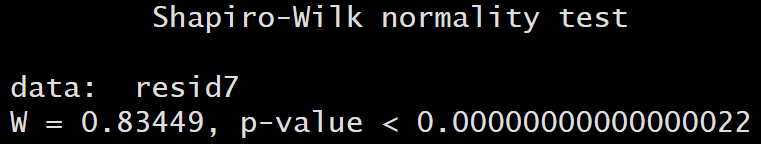
- 해석
    - 귀무가설 : 각 요인의 잔차들은 정규성을 만족한다
    - p-value < 0.0001 → 귀무가설 기각

=====

- 등분산성 검정


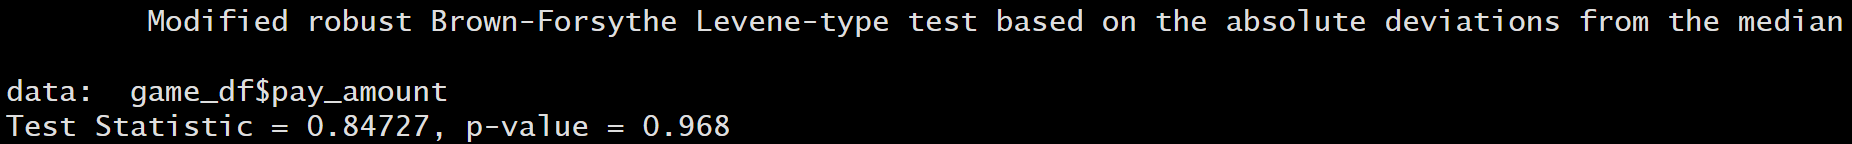
- 해석
    - 귀무가설 : 각 요인의 요소들은 등분산성을 만족한다
    - p-value = 0.968 → 귀무가설 기각 불가

=====

- 독립성 검정


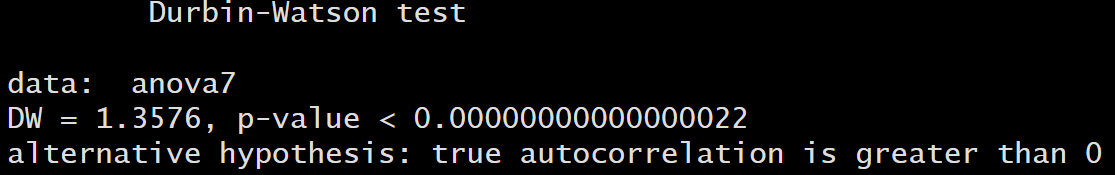
- 해석
    - 귀무가설 : 각 요인의 잔차들은 독립성을 만족한다
    - p-value < 0.0001 → 귀무가설 기각

---
### pay_amount ~ main_pay_item
- 일원배치 ANOVA


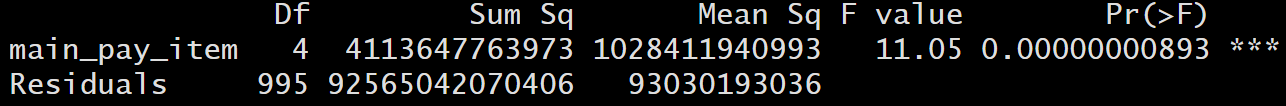
- 해석
    - 귀무가설 : 'main_pay_item' 요소들 간 평균의 차이가 없음
    - p-value < 0.0001 → 귀무가설 기각

=====

- 사후 검정


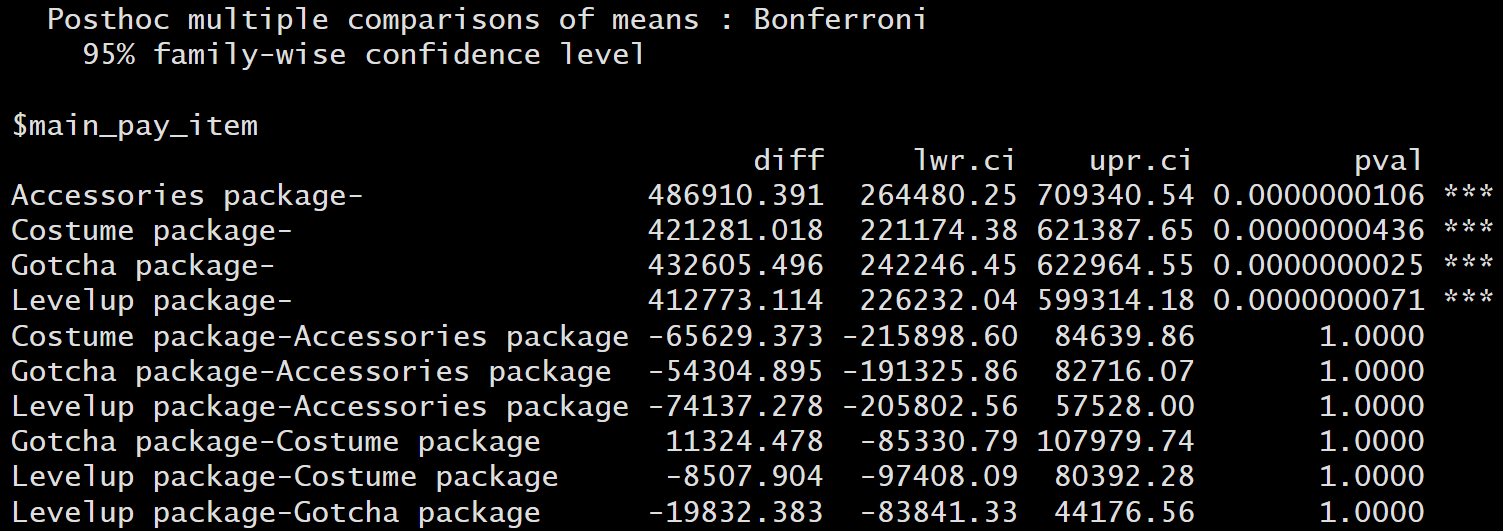
- 해석
    - 결측치가 'main_pay_item' ANOVA의 결과에 큰 영향을 미침
    - 따라서 'main_pay_item'은 요소들 간 평균의 차이가 없다고 볼 수 있음

---
### 고객 세그먼트 분류 - 결론

- 아래 3가지 변수를 기준으로 고객 세그먼트 기준 생성

- 'last_login_date'
    - 'last_login_date'의 요인 간 평균의 차이가 통계적으로 유의미함
    - 또한 등분산성도 만족하고 있음 (but 정규성/독립성 만족X)
    - 따라서 가장 우선적으로 'last_login_date'로 고객 세그먼트를 분류 시도

- 'level'
    - 'level'의 요인 간 평균의 차이가 통계적으로 유의미함
    - 다만 등분산성/정규성/독립성 만족X
    - 통계적 근거는 약하지만 요인 간 평균 차이를 바탕으로 'level' 변수로 고객 세그먼트 분류 시도

- 'battle_pass_level'
    - 'battle_pass_level'의 요인 간 평균의 차이가 통계적으로 유의미함
    - 다만 등분산성/정규성/독립성 만족X
    - 통계적 근거는 약하지만 요인 간 평균 차이를 바탕으로 'battle_pass_level' 변수로 고객 세그먼트 분류 시도

---
# 데이터 군집

---
## k-means : 전처리

In [22]:
# clustering_df 생성
clustering_df_1 = game_df[['last_login_date', 'level']]

# last_login_date 숫자 변환
clustering_df_1['last_login_date'] = pd.to_datetime(clustering_df_1['last_login_date']).astype('int64')

clustering_df_1

,last_login_date,level
0,1690416000000000000,100.0
1,1709510400000000000,100.0
2,1710374400000000000,99.0
3,1700870400000000000,99.0
4,1688083200000000000,99.0
...,...,...
995,1665187200000000000,1.0
996,1654732800000000000,1.0
997,1669334400000000000,1.0
998,1671753600000000000,1.0


'\nElbow Method k= (1, 30)인 이유 :\n    22/02 ~ 24/06 : 총 29개 년/월이 존재\n    따라서 총 29개 중에서 몇 개의 그룹으로 군집화 하는게 좋을지 결정\n'

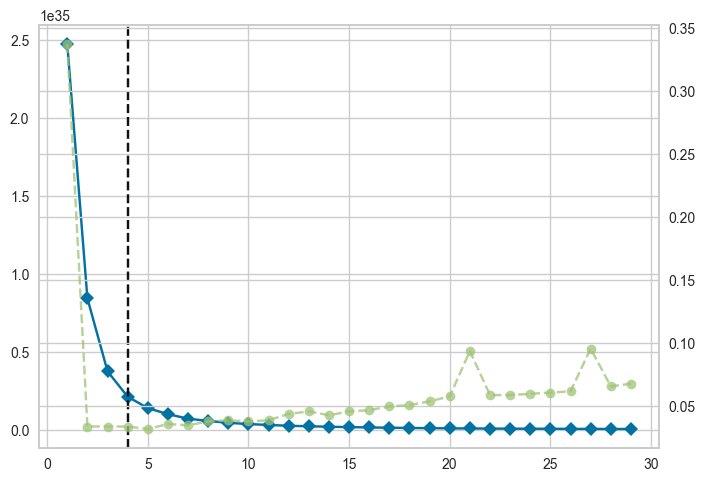

In [23]:
# Elbow Method 생성

# k-means 모델 생성
model = KMeans()

# Elbow Method 실행
visualizer = KElbowVisualizer(model, k= (1, 30))
visualizer.fit(clustering_df_1)

"""
Elbow Method k= (1, 30)인 이유 :
    22/02 ~ 24/06 : 총 29개 년/월이 존재
    따라서 총 29개 중에서 몇 개의 그룹으로 군집화 하는게 좋을지 결정
"""

---
## k-means : 모델링

In [24]:
# KMeans 모델링 (k= 4)

# k-means 모델 생성
model_kmeans = KMeans(n_clusters= 4, random_state= 42)

# k-means 모델 적합
model_kmeans.fit(clustering_df_1)

# k-means 모델 예측
clustering_df_1['k_means_cluster'] = model_kmeans.predict(clustering_df_1)

# 데이터 확인
clustering_df_1

,last_login_date,level,k_means_cluster
0,1690416000000000000,100.0,0
1,1709510400000000000,100.0,2
2,1710374400000000000,99.0,2
3,1700870400000000000,99.0,2
4,1688083200000000000,99.0,0
...,...,...,...
995,1665187200000000000,1.0,3
996,1654732800000000000,1.0,1
997,1669334400000000000,1.0,3
998,1671753600000000000,1.0,3


In [25]:
# clustering_df 병합
game_df = pd.concat([game_df, clustering_df_1['k_means_cluster']], axis=1)

# 데이터 확인
game_df.info()
game_df[['user_id', 'email', 'pay_amount', 'level', 'battle_pass_level', 'last_login_date', 'k_means_cluster']].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            1000 non-null   object 
 1   first_name         1000 non-null   object 
 2   last_name          1000 non-null   object 
 3   email              1000 non-null   object 
 4   gender             1000 non-null   object 
 5   ip_address         1000 non-null   object 
 6   country            1000 non-null   object 
 7   pay_store          1000 non-null   object 
 8   pay_amount         1000 non-null   float64
 9   information_agree  1000 non-null   object 
 10  first_login_date   1000 non-null   object 
 11  pay_user_type      1000 non-null   object 
 12  level              1000 non-null   float64
 13  action_user_type   1000 non-null   object 
 14  playtime           1000 non-null   float64
 15  battle_pass_level  1000 non-null   float64
 16  last_login_date    1000 n

,user_id,email,pay_amount,level,battle_pass_level,last_login_date,k_means_cluster
0,0a3e6ec7-0566-468c-a6b8-ae08484baeab,tmallabari@wordpress.com,1202020.0,100.0,20.0,2023-07-27,0
1,2aeee7a4-7e40-47e7-8d06-e24c2b869b62,gpimlott97@is.gd,1412096.0,100.0,20.0,2024-03-04,2
2,40398eee-ae54-4929-8b2b-b3efce2bbe45,cmoncarr6n@europa.eu,1150450.0,99.0,20.0,2024-03-14,2
3,19dee50f-ca43-4d9f-bbe4-de726f63255f,nsatterlee7i@census.gov,999731.0,99.0,20.0,2023-11-25,2
4,a0db93cd-876b-4156-9f9d-d5eec5a4c973,jkilmarydw@imdb.com,1720862.0,99.0,20.0,2023-06-30,0


---
## k-means : 데이터확인

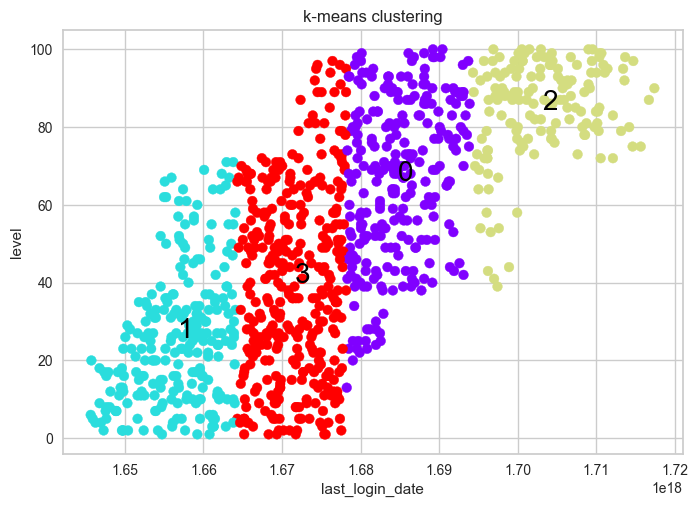

In [26]:
# clustering_df 시각화

# cluster 별 라벨 생성
x = clustering_df_1.groupby('k_means_cluster').mean()['last_login_date']
y = clustering_df_1.groupby('k_means_cluster').mean()['level']
label = clustering_df_1.groupby('k_means_cluster').mean().index

# 그래프 생성
plt.scatter(clustering_df_1['last_login_date'], clustering_df_1['level'], c= clustering_df_1['k_means_cluster'], cmap= 'rainbow')
for i in range(len(x)):
    plt.text(x[i], y[i], s= label[i], color= 'black', fontsize= 20)

plt.xlabel('last_login_date')
plt.ylabel('level')
plt.title('k-means clustering')
plt.show()

In [29]:
# cluster ~ 'pay_amount'

# cluster 별 'pay_amount'
game_df[['k_means_cluster', 'pay_count', 'pay_amount', 'playtime']].groupby('k_means_cluster').mean().sort_values(by= 'pay_amount', ascending= False)

,pay_count,pay_amount,playtime
k_means_cluster,,,
2,7.540000,722077.773333,8560.515400
0,6.611538,500294.411538,6892.078192
3,6.025788,329847.773639,4348.005014
1,5.510373,248239.141079,2920.539295


In [ ]:
# cluster ~ 'last_login_date'
last_login_date_max = game_df[['k_means_cluster', 'last_login_date']].groupby('k_means_cluster').max().rename(columns= {'last_login_date' : 'last_login_date_max'})
last_login_date_min = game_df[['k_means_cluster', 'last_login_date']].groupby('k_means_cluster').min().rename(columns= {'last_login_date' : 'last_login_date_min'})

pd.concat([last_login_date_max, last_login_date_min], axis= 1).sort_values(by= 'last_login_date_min', ascending= False)

,last_login_date_max,last_login_date_min
k_means_cluster,,
2,2024-06-03,2023-09-10
0,2023-09-05,2023-03-08
3,2023-03-07,2022-09-28
1,2022-09-25,2022-02-24


---
# R분석

In [ ]:
### 작업공간 및 라이브러리 호출
setwd("C:/Users/ucanb/OneDrive/03_DATABASE/03_R")
options(scipen= 999)

library(leaps)
library(car)
library(lmtest)
library(lawstat)
library(DescTools)


### 데이터 로드
game_df = read.csv('game_final2.csv')
game_df = subset(game_df, select= c(gender, country, pay_store, pay_amount, information_agree, first_login_date,
                                    pay_user_type, level, action_user_type, playtime, battle_pass_level, 
                                    last_login_date, main_pay_item, pay_count))
str(game_df)
view(game_df)


### 다중 선형회귀
model1 = lm(data= game_df, pay_amount ~ .)
summary(model1)

par(mfrow= c(1,1))
plot(model1, 2)
plot(model1, 3)


### 변수선택
start.model1 = lm(data= game_df, pay_amount ~ 1)
full.model1 = lm(data= game_df, pay_amount ~ .)

  # 전진 선택
  step(start.model1, scope= list(lower= start.model1, upper= full.model1), direction= 'forward')
  summary(lm(formula = pay_amount ~ playtime + battle_pass_level + level + action_user_type, data = game_df))
  
  # 후진 제거
  step(full.model1, data= game_df, direction= 'backward')
  summary(lm(formula = pay_amount ~ country + pay_store + first_login_date + pay_user_type + level + battle_pass_level + last_login_date + main_pay_item, data = game_df))
  
  # 단계별 선택
  step(start.model1, scope= list(upper= full.model1), data= game_df, direction= 'both')
  summary(lm(formula = pay_amount ~ playtime + battle_pass_level + level + action_user_type, data = game_df))

  
### 변수선택 후 회귀분석 실행
model2 = lm(data = game_df, pay_amount ~ country + pay_store + first_login_date + 
              pay_user_type + level + battle_pass_level + last_login_date + 
              main_pay_item)
summary(model2)

par(mfrow= c(2,2))
plot(model2)


### 선형회귀 사후검정

  # 정규성 검정
  shapiro.test(model1$residuals)
  shapiro.test(model2$residuals)

  # 등분산성 검정
  ncvTest(model1)
  ncvTest(model2)

  # 독립성 검정
  dwtest(model1)
  dwtest(model2)
  
  # 다중공선성 확인
  vif(model1)
  vif(model2)


#### ANOVA

  ## pay_amount ~ country
  anova1 = aov(data= game_df, pay_amount ~ country) ; summary(anova1)
  
  ## pay_amount ~ pay_store
  anova2 = aov(data= game_df, pay_amount ~ pay_store) ; summary(anova2)
  
  ## pay_amount ~ first_login_date
  anova3 = aov(data= game_df, pay_amount ~ first_login_date) ; summary(anova3)
  
  ## pay_amount ~ pay_user_type
  anova4 = aov(data= game_df, pay_amount ~ pay_user_type) ; summary(anova4)
  
  ## pay_amount ~ level
  anova5 = aov(data= game_df, pay_amount~factor(level)) ; summary(anova5)
  boxplot(data= game_df, pay_amount ~ level)
  
      # 정규성 검정
      resid5 = residuals(anova5)
      shapiro.test(resid5)
  
      # 등분산성 검정
      leveneTest(data= game_df, pay_amount ~ level)
      bartlett.test(data= game_df, pay_amount ~ level)
      fligner.test(data= game_df, pay_amount ~ level)
      
      # 등분산이 아닌 ANOVA
      oneway.test(data= game_df, pay_amount ~ level, var.equal= F)
      
      # 독립성 검정
      dwtest(anova5)
      
      # 사후 검정
      PostHocTest(anova5, method= 'bonferroni')
      TukeyHSD(anova5)

      
  ## pay_amount ~ battle_pass_level
  anova6 = aov(data= game_df, pay_amount ~ battle_pass_level) ; summary(anova6)
  boxplot(data= game_df, pay_amount ~ battle_pass_level)
  
      # 정규성 검정
      resid6 = residuals(anova6)
      shapiro.test(resid6)
      
      # 등분산성 검정
      levene.test(game_df$pay_amount, game_df$battle_pass_level)
      bartlett.test(data= game_df, pay_amount ~ battle_pass_level)
      fligner.test(data= game_df, pay_amount ~ battle_pass_level)
    
      # 등분산이 아닌 ANOVA
      oneway.test(data= game_df, pay_amount ~ battle_pass_level, var.equal= F)
      
      # 독립성 검정
      dwtest(anova6)
      
      # 사후 검정
      PostHocTest(anova6, method= 'bonferroni')
      
  ## pay_amount ~ last_login_date
  anova7 = aov(data= game_df, pay_amount ~ last_login_date) ; summary(anova7)
  boxplot(data= game_df, pay_amount ~ last_login_date)
  
      # 정규성 검정
      resid7 = residuals(anova7)
      shapiro.test(resid7)
  
      # 등분산성 검정
      levene.test(game_df$pay_amount, game_df$last_login_date)
      bartlett.test(data= game_df, pay_amount ~ last_login_date)
      fligner.test(data= game_df, pay_amount ~ last_login_date)
      
      # 독립성 검정
      dwtest(anova7)
      
      # 사후 검정
      PostHocTest(anova7, method= 'bonferroni')
  
  ## pay_amount ~ main_pay_item
  anova8 = aov(data= game_df, pay_amount ~ main_pay_item) ; summary(anova8)
  boxplot(data= game_df, pay_amount ~ main_pay_item)
  
      # 정규성 검정
      resid8 = residuals(anova8)
      shapiro.test(resid8)
      
      # 등분산성 검정
      levene.test(game_df$pay_amount, game_df$main_pay_item)
      bartlett.test(data= game_df, pay_amount ~ main_pay_item)
      fligner.test(data= game_df, pay_amount ~ main_pay_item)
      
      # 등분산이 아닌 ANOVA
      oneway.test(data= game_df, pay_amount ~ main_pay_item, var.equal= F)
      
      # 사후 검정
      PostHocTest(anova8, method= 'bonferroni')